In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\asus`


In [121]:
Pkg.add(["CairoMakie","LinearAlgebra","Distributions","Convex","SCS","StatsBase","StatsPlots"])

   Resolving package versions...
   Installed SentinelArrays ──── v1.4.6
   Installed Distances ───────── v0.10.12
   Installed NearestNeighbors ── v0.4.20
   Installed StatsPlots ──────── v0.15.7
   Installed Widgets ─────────── v0.6.6
   Installed MultivariateStats ─ v0.10.3
   Installed Arpack_jll ──────── v3.5.1+1
   Installed Clustering ──────── v0.15.7
   Installed TableOperations ─── v1.2.0
   Installed Arpack ──────────── v0.5.4
    Updating `C:\Users\asus\Project.toml`
  [f3b207a7] + StatsPlots v0.15.7
    Updating `C:\Users\asus\Manifest.toml`
  [7d9fca2a] + Arpack v0.5.4
  [aaaa29a8] + Clustering v0.15.7
  [b4f34e82] + Distances v0.10.12
  [6f286f6a] + MultivariateStats v0.10.3
  [b8a86587] + NearestNeighbors v0.4.20
  [91c51154] + SentinelArrays v1.4.6
  [f3b207a7] + StatsPlots v0.15.7
  [ab02a1b2] + TableOperations v1.2.0
  [cc8bc4a8] + Widgets v0.6.6
⌅ [68821587] + Arpack_jll v3.5.1+1
        Info Packages marked with ⌅ have new versions available but compatibility constr

In [123]:
using CairoMakie, LinearAlgebra, Statistics, Distributions, Convex, SCS, StatsBase, Plots, StatsPlots

In [4]:
x = LinRange(0,4,100)

100-element LinRange{Float64, Int64}:
 0.0, 0.040404, 0.0808081, 0.121212, …, 3.87879, 3.91919, 3.9596, 4.0

In [138]:
col_list = Vector{Float64}[]
for p in 0:19
    push!(col_list, x .^ p)
end
A = reduce(hcat,col_list)

100×20 Matrix{Float64}:
 1.0    1.0      1.0       1.0    …       1.0              1.0
 1.0    2.0      4.0       8.0       262144.0         524288.0
 1.0    3.0      9.0      27.0            3.8742e8         1.16226e9
 1.0    4.0     16.0      64.0            6.87195e10       2.74878e11
 1.0    5.0     25.0     125.0            3.8147e12        1.90735e13
 1.0    6.0     36.0     216.0    …       1.0156e14        6.0936e14
 1.0    7.0     49.0     343.0            1.62841e15       1.13989e16
 1.0    8.0     64.0     512.0            1.80144e16       1.44115e17
 1.0    9.0     81.0     729.0            1.50095e17       1.35085e18
 1.0   10.0    100.0    1000.0            1.0e18          -8.44674e18
 1.0   11.0    121.0    1331.0    …       5.55992e18       5.81886e18
 1.0   12.0    144.0    1728.0            8.17659e18       5.88535e18
 1.0   13.0    169.0    2197.0            1.77494e18       4.62751e18
 ⋮                                ⋱                   
 1.0   89.0   7921.0  70496

In [7]:
y = x .^2

100-element Vector{Float64}:
  0.0
  0.0016324864809713297
  0.006529945923885319
  0.014692378328741967
  0.026119783695541274
  0.040812162024283234
  0.05876951331496787
  0.07999183756759513
  0.1044791347821651
  0.1322314049586777
  0.16324864809713294
  0.19753086419753085
  0.23507805325987147
  ⋮
 12.641975308641975
 12.9309254157739
 13.223140495867767
 13.51862054892358
 13.817365574941332
 14.11937557392103
 14.424650545862667
 14.733190490766248
 15.044995408631774
 15.360065299459238
 15.67840016324865
 16.0

In [160]:
# function to fit least square fit using the pseudo-inverse of the design matrix
function fitlq(A,y)
    Ainv = pinv(A)
    return Ainv * y
end

# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(norm(A*x-y,2) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

function geterror(y, A, polycoef)
    y_fit = A * polycoef
    return mean((y - y_fit).^2)
end

geterror (generic function with 1 method)

In [161]:
pseudofit = []
lassofit = []
MSEpseudo = []
MSElasso = []
for i in 0:99
    y1 = y + rand(Normal(0,0.1),length(y)) 
    pseudofit = push!(pseudofit, fitlq(A[:,1:20], y1))
    lassofit = push!(lassofit, lasso(A[:,1:20], y1, 0.1, 0))
    MSEpseudo = push!(MSEpseudo, geterror(y, A, pseudofit[i+1]))
    MSElasso = push!(MSElasso, geterror(y, A, lassofit[i+1]))
end
pseudo_coef = [getindex.(pseudofit, i) for i in 1:20]
lasso_coef = [getindex.(lassofit, i) for i in 1:20]

20-element Vector{Vector{Float64}}:
 [4.0232060620829036e-19, 1.887730036632464e-19, 3.7471172870092967e-19, 3.0438985075274656e-19, 4.062112775054818e-19, 2.980791294901896e-19, 4.0543292024848375e-19, 1.466450667568533e-19, 4.1530644509625573e-19, 4.046335599430761e-19  …  1.3722357265113491e-19, 9.956181054707372e-20, 3.405536313229916e-19, 2.3807279640452543e-19, 2.422022817421589e-19, 1.6529302495454182e-19, 1.7032877338979654e-19, 3.434972400088166e-19, 3.928062588283669e-19, 1.5378505044204697e-19]
 [9.259602245246756e-18, 2.4331354435379338e-18, 8.57496277637151e-18, 5.527484250461762e-18, 8.905230650704156e-18, 5.143224982991206e-18, 9.022042887357478e-18, 8.5698658654919445e-19, 8.990173670004029e-18, 8.916895534613356e-18  …  6.209273702435114e-19, 2.9313133674862033e-19, 7.255382413718931e-18, 4.270861844790162e-18, 4.324601628320934e-18, 2.0820153458519445e-18, 1.0549839381700266e-18, 7.497641349440827e-18, 9.251399001042499e-18, 6.387075425918893e-19]
 [2.1284700938645918

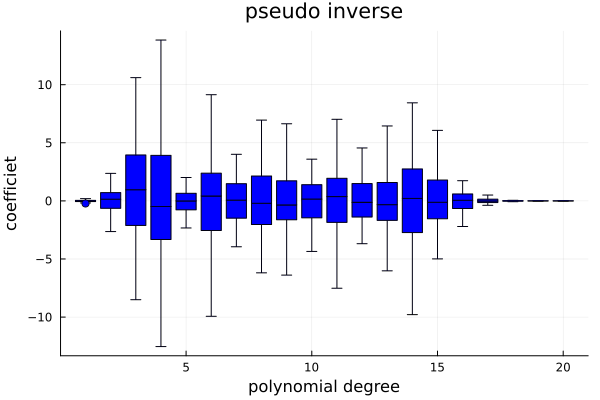

In [135]:
StatsPlots.boxplot(pseudo_coef, color = "blue", xlabel = "polynomial degree", ylabel = "coefficiet",legend = false, title = "pseudo inverse")

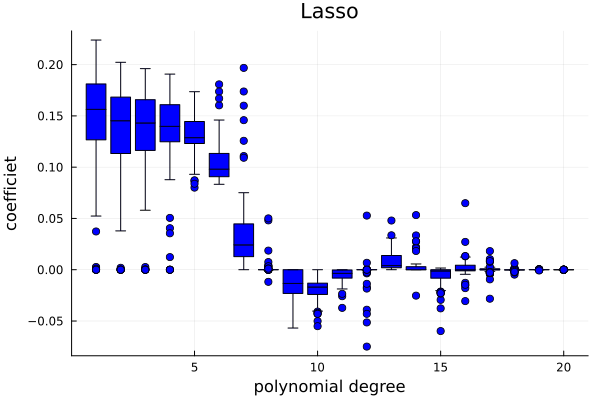

In [136]:
StatsPlots.boxplot(lasso_coef, color = "blue", xlabel = "polynomial degree", ylabel = "coefficiet",legend = false, title = "Lasso")

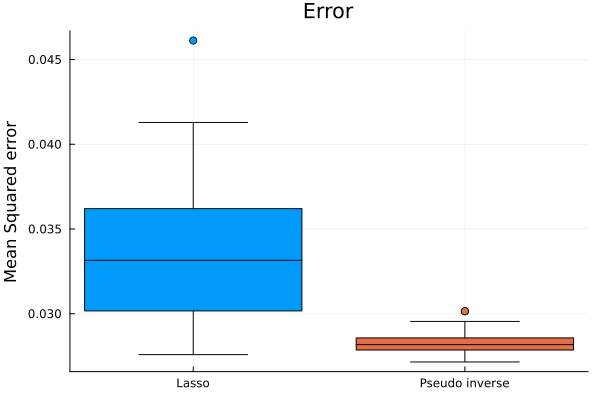

In [169]:
StatsPlots.boxplot([MSElasso, MSEpseudo], legend = false, ylabel = "Mean Squared error", 
    title = "Error", xticks=(1:2, ["Lasso", "Pseudo inverse"]))